In [2]:
import matplotlib.pyplot as plt
import numpy as np

from dadapy.plot import plot_inf_imb_plane
from dadapy.metric_comparisons import MetricComparisons

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
# sample dataset

N = 1000

cov = np.identity(3)
cov[-1, -1] = 0.2**2  # variance along z is much smaller!
mean = np.zeros(3)
X = np.random.multivariate_normal(mean=mean, cov=cov, size=(N)) # Nxd

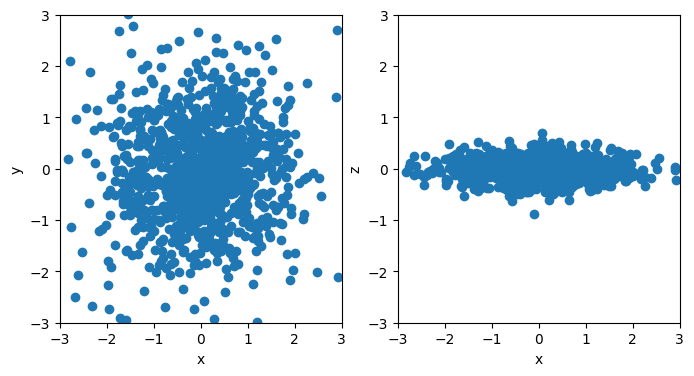

In [5]:
# plot the sampled points

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.scatter(X[:, 0], X[:, 1])
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.scatter(X[:, 0], X[:, 2])
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_xlabel("x")
ax2.set_ylabel("z")
plt.show()

In [10]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X, maxk=N-1)

In [11]:
# list of the coordinate names
labels = ["x", "y", "z"]

# list of the the subsets of coordinates for which the imbalance should be computed
coord_list = [
    [
        0,
    ],
    [
        1,
    ],
    [
        2,
    ],
    [0, 1],
    [0, 2],
    [1, 2],
]

In [12]:
# compute the information imbalances from the full 3D space to the spaces in coord_list and vice versa

imbalances = d.return_inf_imb_full_selected_coords(coord_list, k=1) 

total number of computations is:  6
total number of computations is:  6


In [14]:
imbalances

array([[0.08, 0.08, 0.36, 0.01, 0.03, 0.03],
       [0.55, 0.57, 0.97, 0.03, 0.55, 0.53]])

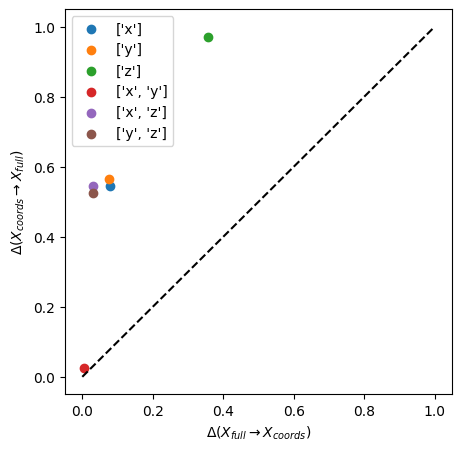

In [13]:
# plot information imbalance plane

plot_inf_imb_plane(imbalances, coord_list, labels)

In [12]:
# compute the imbalance between the [x] space and the [y] space
imb_x_y = d.return_inf_imb_two_selected_coords(coords1=[0], coords2=[1])
print(imb_x_y)

# compute the imbalance between the [x, y] space and the [z] space
imb_xy_z = d.return_inf_imb_two_selected_coords(coords1=[0, 1], coords2=[2])
print(imb_xy_z)

(1.026442, 0.9843200000000001)
(0.9830460000000001, 0.980426)
